In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as f
import random

# Results

## Model Selection

## Permutations

Need: tuned Model, reference database of regulatory pairs, 
Steps: 
1. Fit regressions (10-fold cross validation)
2. Permutation test (null distribution based on 1000 random matches)
3. Compare predicted matches against null distribution

Steps 1 and 2 can be found in the python scripts. These will produce files. Step 3 is done here. 

All of the following Models were tuned, trained using 151 predictors and by taking the median out of the cross validated predictions.

In [2]:
# import permutation scores
percentages = list(np.arange(0, 1.02, 0.02))

In [3]:
# import results from linear model
linear_permut = pd.read_pickle('linear/permutations.pkl')

linear_count = pd.DataFrame(pd.read_pickle('linear/count.pkl'), columns = ['matches'])
linear_permut['percentages'], linear_count['percentages']=percentages, percentages

linear_p_values, linear_z_scores = f.get_pvalue(count = linear_count, permut = linear_permut)

In [4]:
# import results from ridge model
ridge_permut = pd.read_pickle('ridge151/permutations.pkl')

ridge_count = pd.DataFrame(pd.read_pickle('ridge151/count.pkl'), columns = ['matches'])
ridge_permut['percentages'], ridge_count['percentages']=percentages, percentages

ridge_p_values, ridge_z_scores = f.get_pvalue(count = ridge_count, permut = ridge_permut)

In [14]:
# import results from lasso model
lasso_permut = pd.read_pickle('lasso/permutations.pkl')

lasso_count = pd.DataFrame(pd.read_pickle('lasso/count.pkl'), columns = ['matches'])
lasso_permut['percentages'], lasso_count['percentages']=percentages, percentages

lasso_p_values, lasso_z_scores = f.get_pvalue(count = lasso_count, permut = lasso_permut)

In [8]:
# import results from rf model
rf_permut = pd.read_pickle('rf_md30/permutations.pkl')

rf_count = pd.DataFrame(pd.read_pickle('rf_md30/count.pkl'), columns = ['matches'])
rf_permut['percentages'], rf_count['percentages']=percentages, percentages

rf_p_values, rf_z_scores = f.get_pvalue(count = rf_count, permut = rf_permut)

Text(0, 0.5, 'p-value')

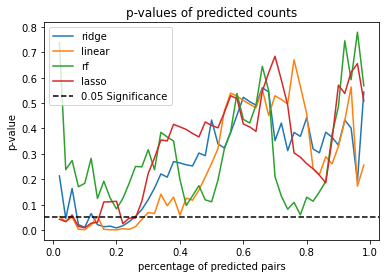

In [15]:
ax = sns.lineplot(x = percentages[1:-1], y = ridge_p_values, label = 'ridge')
sns.lineplot(x = percentages[1:-1], y = linear_p_values, label = 'linear')
sns.lineplot(x = percentages[1:-1], y = rf_p_values, label = 'rf')
sns.lineplot(x = percentages[1:-1], y = lasso_p_values, label = 'lasso')
ax.axhline(0.05, ls = '--', c='black', label = '0.05 Significance')
ax.legend()
ax.set_title('p-values of predicted counts')
ax.set_xlabel('percentage of predicted pairs')
ax.set_ylabel('p-value')

This shows the p-values with respect to the number of matches when looking at the most extreme x percent. For example looking a the highest 1% and the lowest 1% of predicted pairs with respect to the size of the coefficients, the null hypothesis that the matches were found randomly can be rejected with a significance value of 0.05% for Ridge and Lineare regression. 

Text(0.5, 0, 'percentage of predicted pairs')

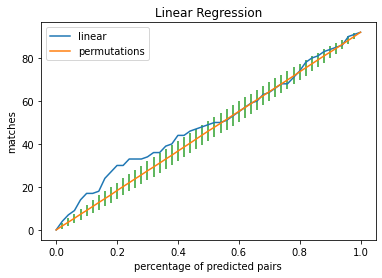

In [13]:
fig = plt.figure
ax = sns.lineplot(data = linear_count, x='percentages', y = 'matches',label='linear')
ax = sns.lineplot(data = linear_permut, x ='percentages', y = 'mean', label='permutations')
ax.errorbar(linear_permut['percentages'], linear_permut['mean'], yerr=linear_permut['std'], fmt=' ', zorder=-1)
ax.legend()
ax.set_title('Linear Regression')
ax.set_xlabel('percentage of predicted pairs')
fig.savefig(plots/permutations/)

#### There are 416 matches from the RegNet database for the 160 relevant genes, looking at predictors and targets. Of those, 91 are also represented in our set of 1109*152=167,459 pairs. 